In [22]:
from pysead.Frame_2D import Frame_2D
from pysead.Frame_2D import Member_2D

In [23]:
M1 = Member_2D(member_number = 1,
               nodes = {1:[0,0], 3:[0,6]},
               area = 75000/1000**2,
               elasticity = 30_000_000,
               inertia = 4.8e8/1000**4)
M2 = Member_2D(member_number = 2,
               nodes = {2:[9,0], 5:[9,6]},
               area = 75000/1000**2,
               elasticity = 30_000_000,
               inertia = 4.8e8/1000**4)
M3 = Member_2D(member_number = 3,
               nodes = {3:[0,6], 4:[0,12]},
               area = 75000/1000**2,
               elasticity = 30_000_000,
               inertia = 4.8e8/1000**4)
M4 = Member_2D(member_number = 4,
               nodes = {3:[0,6], 5:[9,6]},
               area = 75000/1000**2,
               elasticity = 30_000_000,
               inertia = 4.8e8/1000**4)
M5 = Member_2D(member_number = 5,
               nodes = {4:[0,12],5:[9,6]},
               area = 75000/1000**2,
               elasticity = 30_000_000,
               inertia = 4.8e8/1000**4)
M5.Add_Load_Full_Uniform(-12)

Frame_3 = Frame_2D()
Frame_3.Compile_Frame_Member_Properties([M1,M2,M3,M4,M5])
Frame_3.supports = {1:[1,1,1], 2:[1,1,1]}

Frame_3.Add_Load_Node({3:[80,0,0], 4:[40,0,0]})

# Frame_3.Add_Load_Node({3:[80,0,0], 4:[40+36,53.99,117],5:[36.53,53.99,-117]})

Frame_3.Solve()

In [24]:
Frame_3.displacements_

{1: [0.0, 0.0, 0.0],
 2: [0.0, 0.0, 0.0],
 3: [0.18542365276311096, 0.0004187389471646133, -0.017619874705581406],
 4: [0.186623367623509, 0.0007136698961752079, 0.017891195648726946],
 5: [0.18552141388617183, -0.00013073894716461473, -0.026028480844180656]}

In [25]:
Frame_3.local_member_forces

{1: array([0, 0, 0, 0, 0, 0]),
 2: array([0, 0, 0, 0, 0, 0]),
 3: array([0, 0, 0, 0, 0, 0]),
 4: array([0, 0, 0, 0, 0, 0]),
 5: array([   0.        ,  -64.89992296, -117.        ,    0.        ,
         -64.89992296,  117.        ])}

In [26]:
Frame_3.solved_member_forces

{1: array([-157.02710519,  106.05122292,  360.44136804,  157.02710519,
        -106.05122292,  275.86596946]),
 2: array([ 49.02710519,  85.94877708, 320.31468527, -49.02710519,
        -85.94877708, 195.37797722]),
 3: array([-110.59910588,    1.61094215,  -80.39374239,  110.59910588,
          -1.61094215,   90.05939531]),
 4: array([ -24.44028077,  -46.42799931, -195.47222706,   24.44028077,
          46.42799931, -222.37976671]),
 5: array([ 288.15455185,   -5.99660089,   26.03782962, -288.15455185,
           5.99660089,  -90.90098559])}

In [27]:
Frame_3.local_member_forces_solved_

{1: array([-157.02710519,  106.05122292,  360.44136804,  157.02710519,
        -106.05122292,  275.86596946]),
 2: array([ 49.02710519,  85.94877708, 320.31468527, -49.02710519,
        -85.94877708, 195.37797722]),
 3: array([-110.59910588,    1.61094215,  -80.39374239,  110.59910588,
          -1.61094215,   90.05939531]),
 4: array([ -24.44028077,  -46.42799931, -195.47222706,   24.44028077,
          46.42799931, -222.37976671]),
 5: array([ 288.15455185,  -70.89652385,  -90.96217038, -288.15455185,
         -58.90332207,   26.09901441])}

In [28]:
Frame_3.displacements_

{1: [0.0, 0.0, 0.0],
 2: [0.0, 0.0, 0.0],
 3: [0.18542365276311096, 0.0004187389471646133, -0.017619874705581406],
 4: [0.186623367623509, 0.0007136698961752079, 0.017891195648726946],
 5: [0.18552141388617183, -0.00013073894716461473, -0.026028480844180656]}

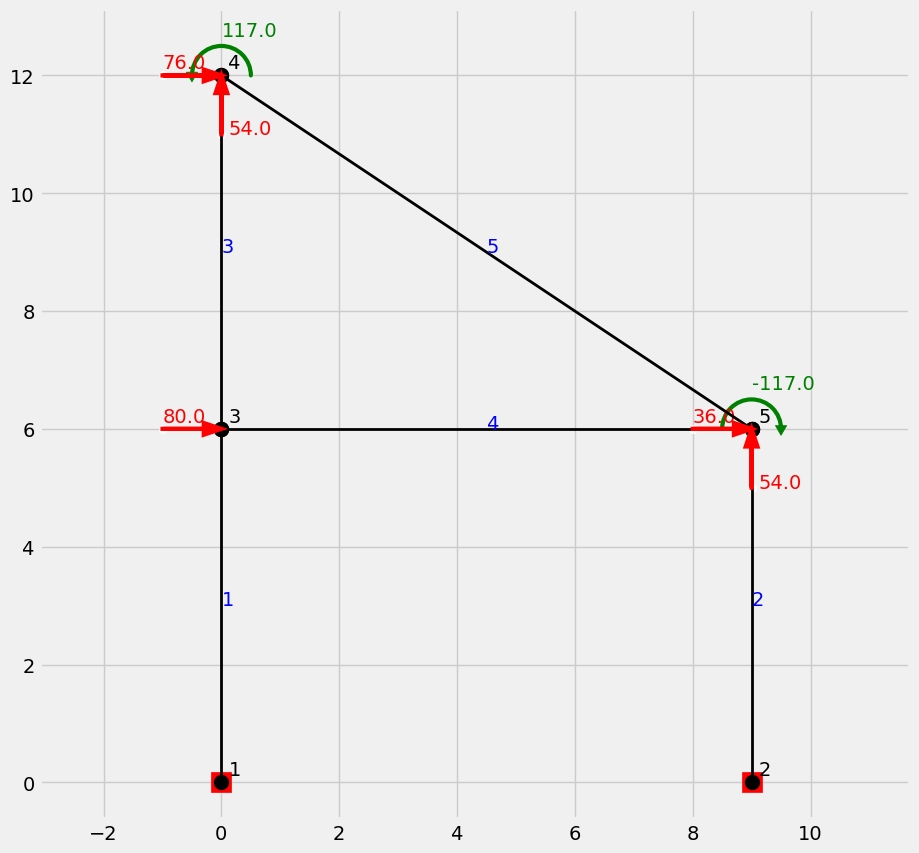

In [29]:
Frame_3.Draw_Frame_Setup(figure_size=[10,10], arrow_line_width=3,arrow_head_size=0.2,radius_of_arc=1)

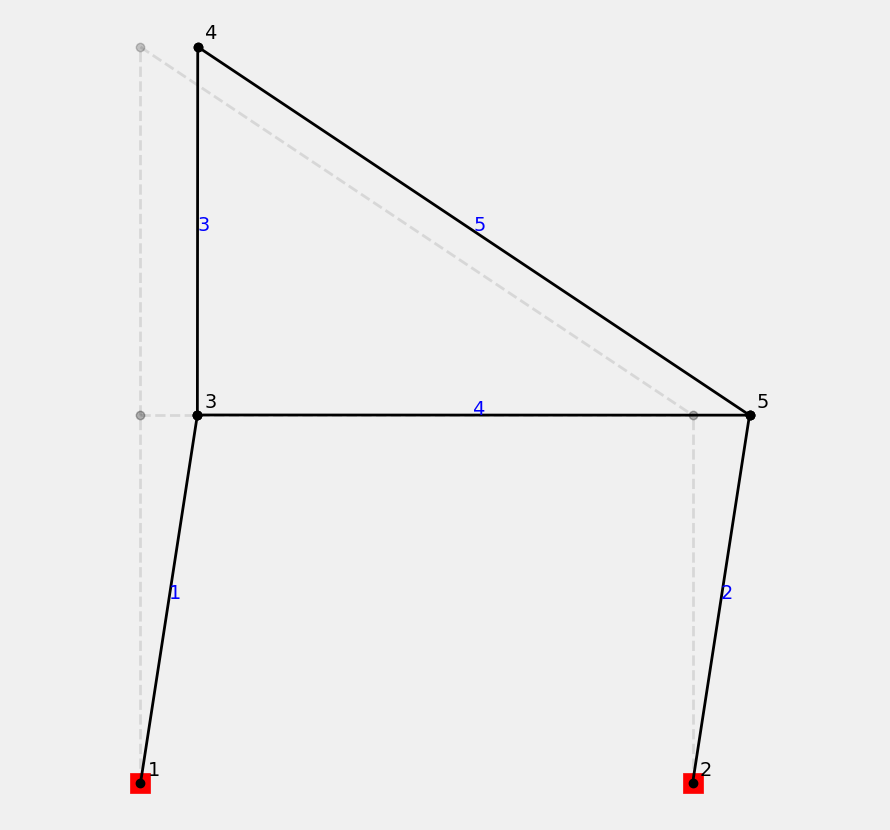

In [30]:
Frame_3.Draw_Frame_Displacements_(figure_size = [10,10], magnification_factor=5)

In [31]:
Frame_3.reactions_

{1: [-106.05122291709338, -157.02710518672995, 360.4413680446755],
 2: [-85.94877708290389, 49.027105186730516, 320.3146852747452]}

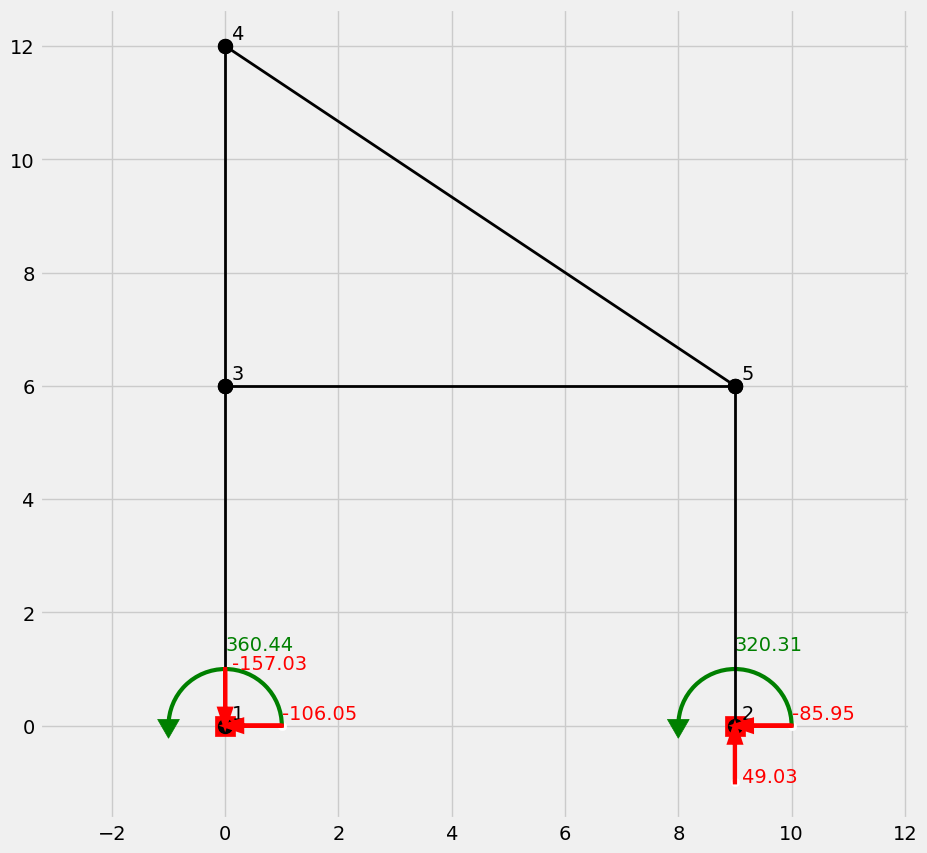

In [32]:
Frame_3.Draw_Reactions_(figure_size=[10,10], arrow_line_width=3,arrow_head_size=0.2,radius_of_arc=2)

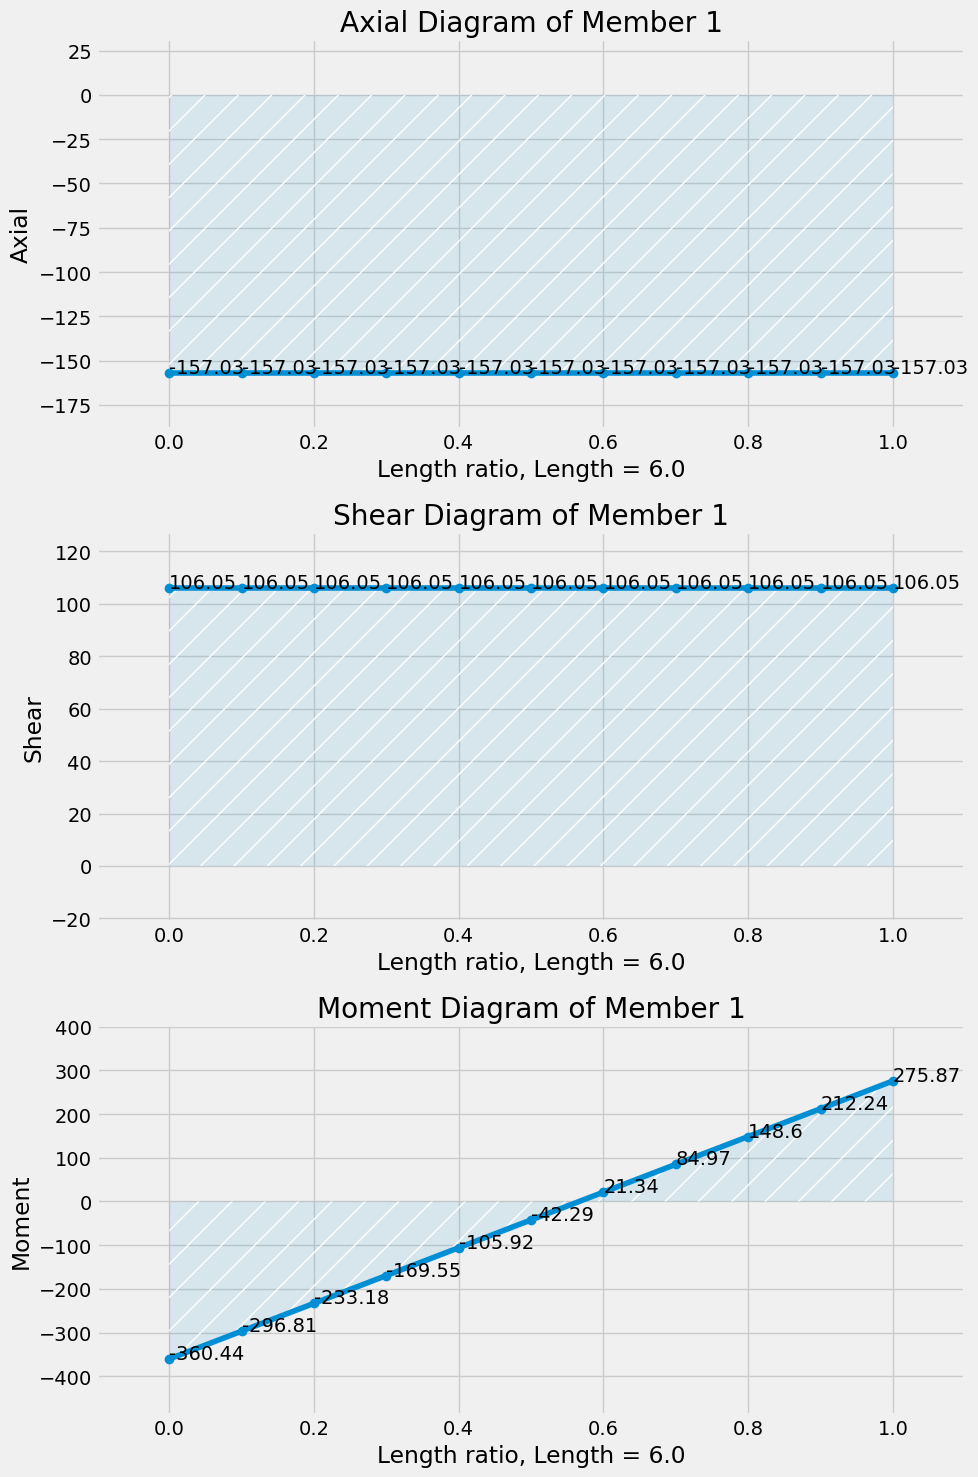

In [33]:
M1.Plot_Diagrams()

In [34]:
M1.Summary()

At Left End:
Axial: -157.02710518672995
Shear: 106.05122291709338
Moment: 360.4413680446755

At Right End:
Axial: -157.02710518672995
Shear: 106.05122291709338
Moment: -275.86596945788483

Minimum and Maximum
Minimum Shear: 106.05122291709338
Maximum Shear: 106.05122291709338
Minimum Moment: -275.86596945788483
Maximum Moment: 360.4413680446755


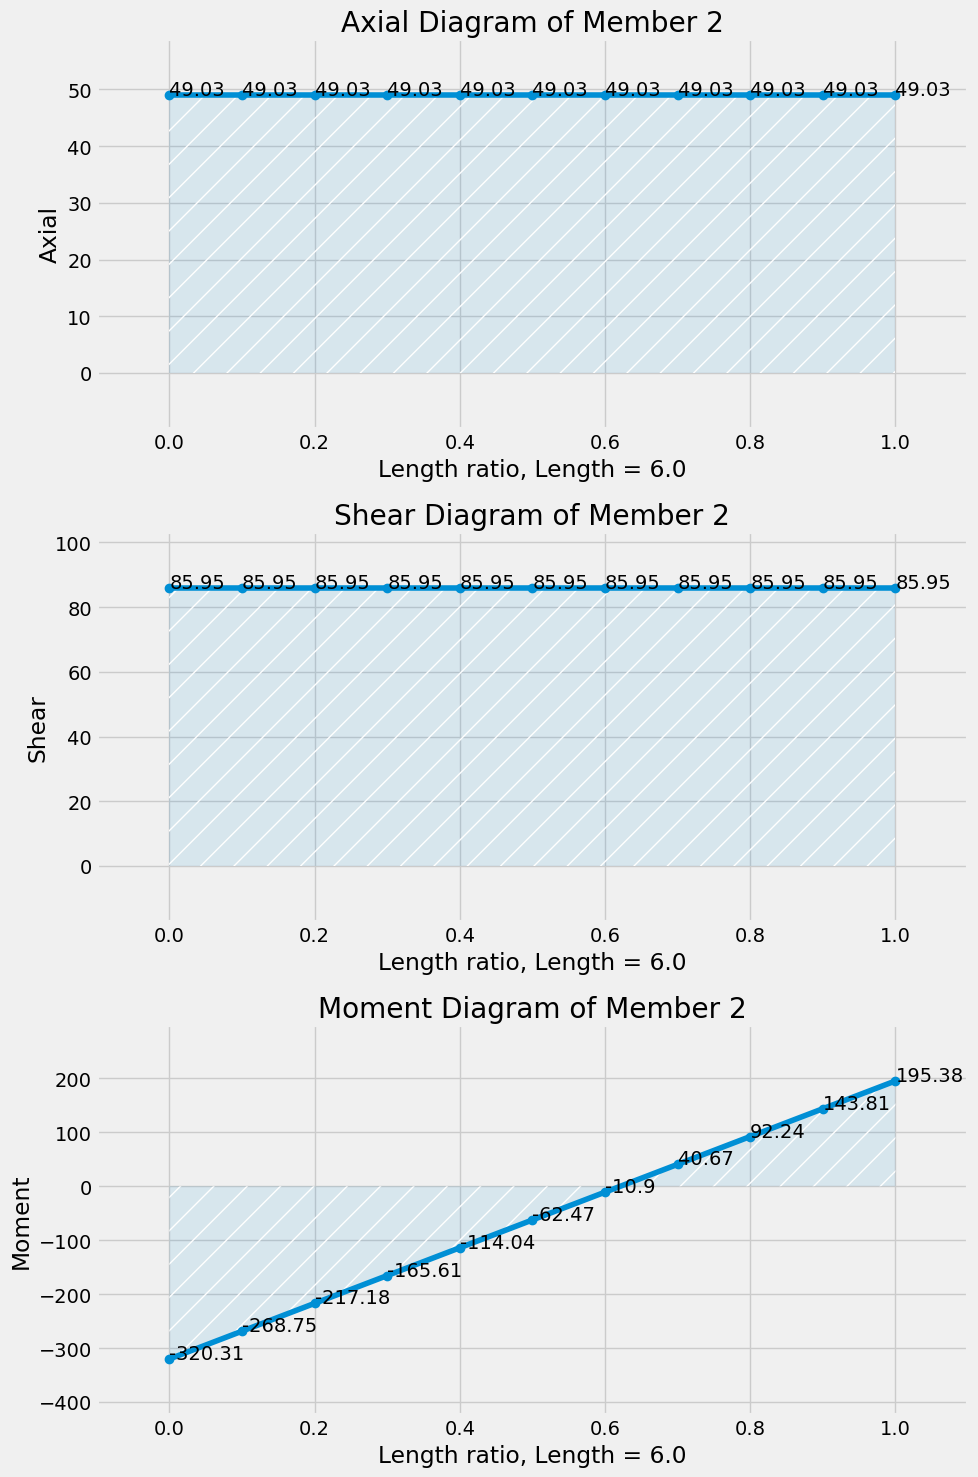

In [35]:
M2.Plot_Diagrams()

In [36]:
M2.Summary()

At Left End:
Axial: 49.027105186730516
Shear: 85.94877708290389
Moment: 320.3146852747452

At Right End:
Axial: 49.027105186730516
Shear: 85.94877708290389
Moment: -195.37797722267806

Minimum and Maximum
Minimum Shear: 85.94877708290389
Maximum Shear: 85.94877708290389
Minimum Moment: -195.37797722267806
Maximum Moment: 320.3146852747452


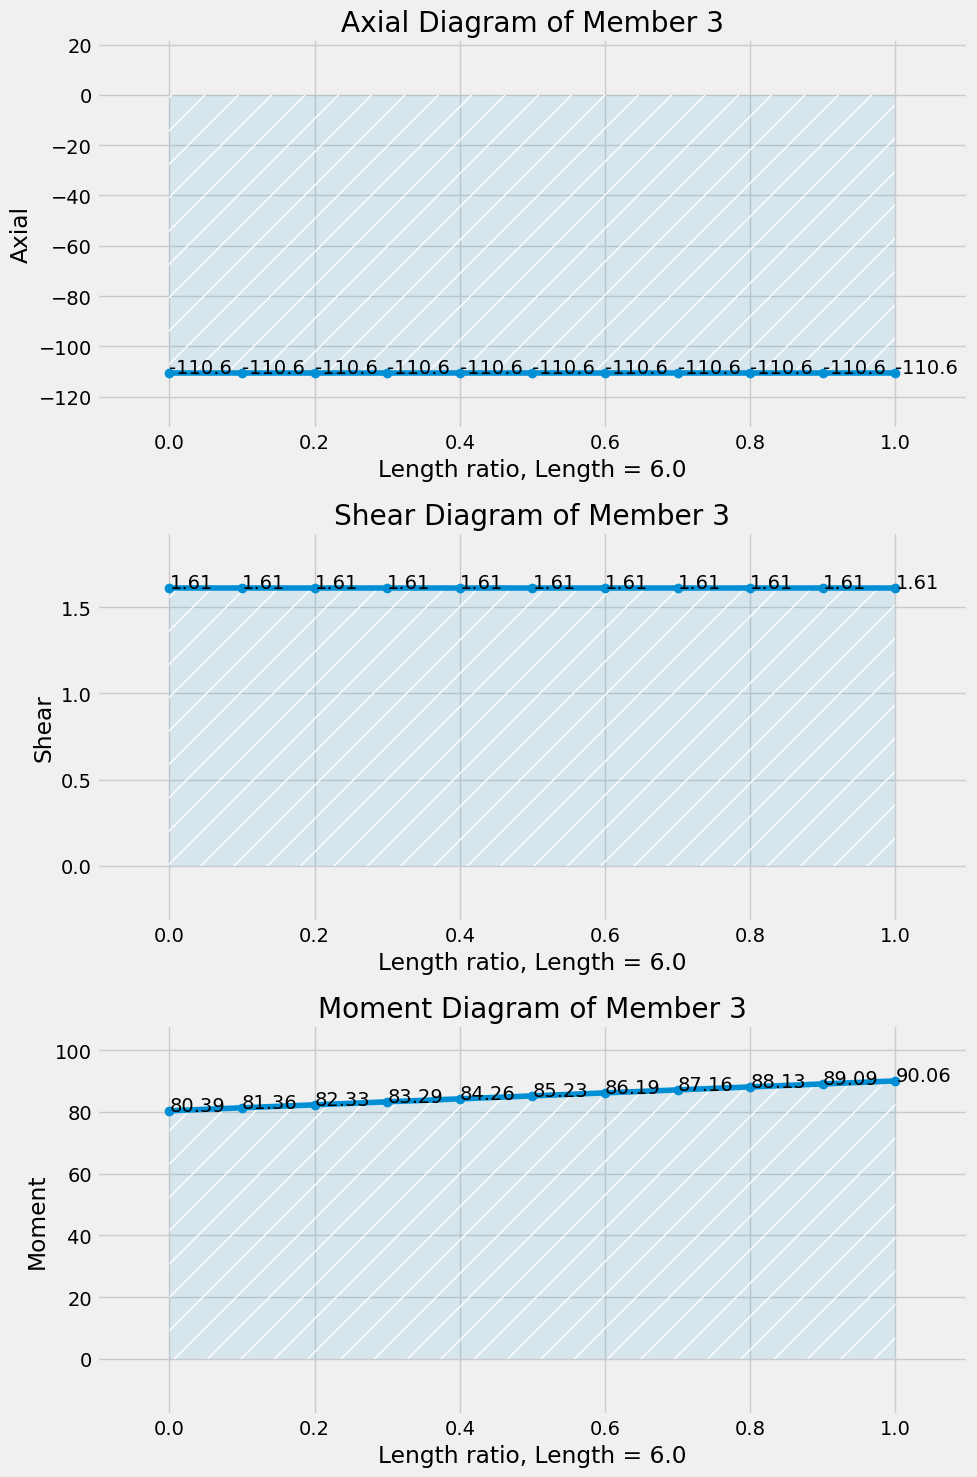

In [37]:
M3.Plot_Diagrams()

In [38]:
M3.Summary()

At Left End:
Axial: -110.59910587897298
Shear: 1.6109421518677323
Moment: -80.39374239473682

At Right End:
Axial: -110.59910587897298
Shear: 1.6109421518677323
Moment: -90.05939530594321

Minimum and Maximum
Minimum Shear: 1.6109421518677323
Maximum Shear: 1.6109421518677323
Minimum Moment: -90.05939530594321
Maximum Moment: -80.39374239473682


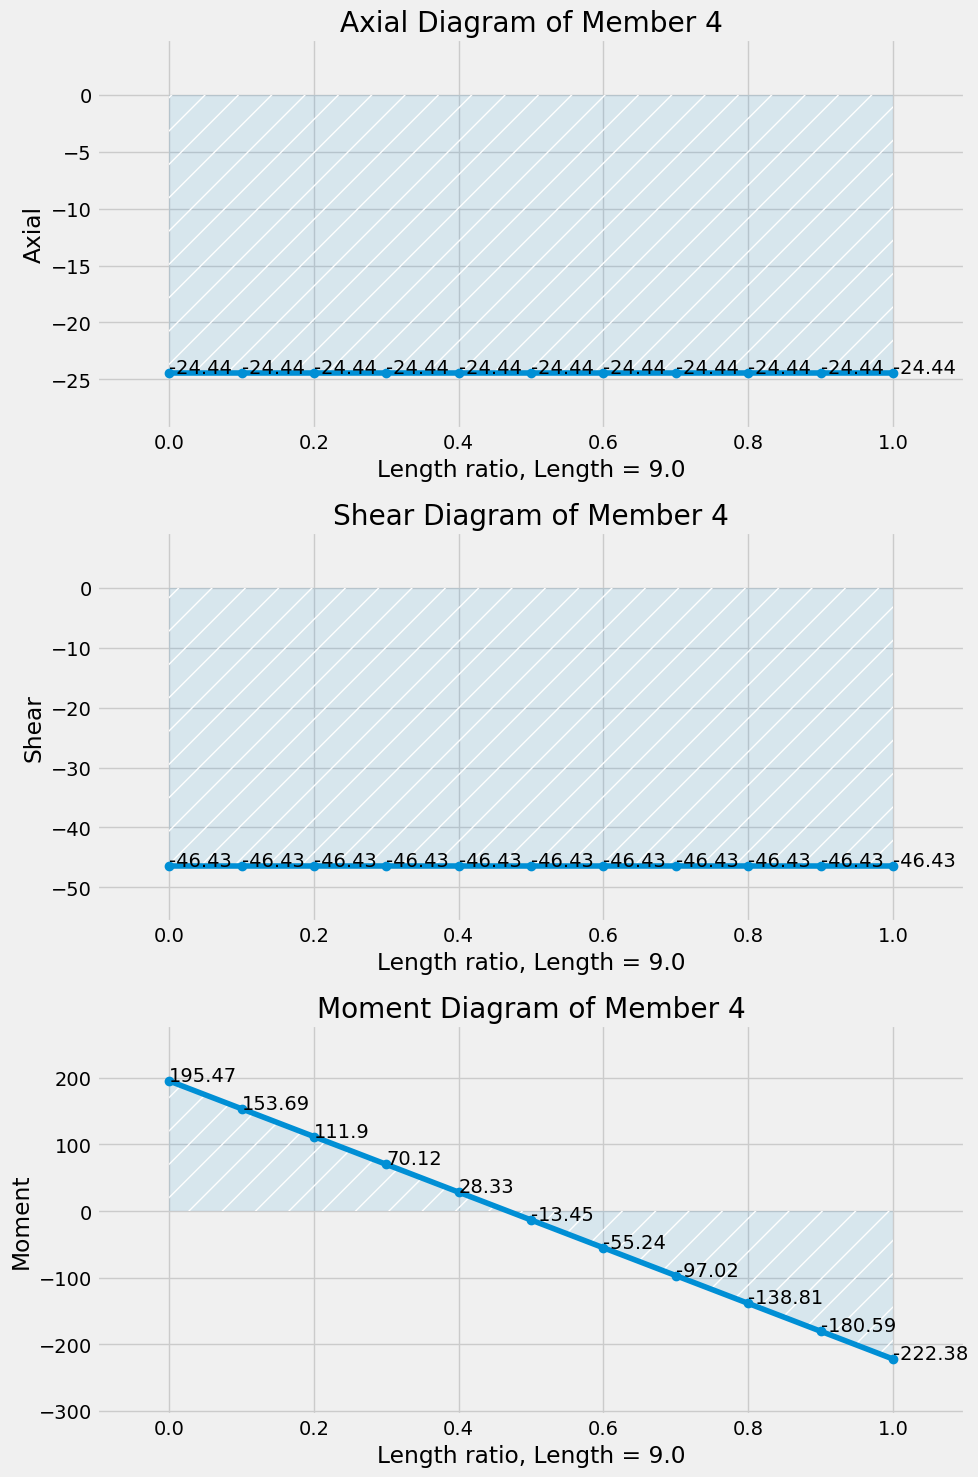

In [39]:
M4.Plot_Diagrams()

In [40]:
M4.Summary()

At Left End:
Axial: -24.440280765214993
Shear: -46.42799930775704
Moment: -195.47222706314793

At Right End:
Axial: -24.440280765214993
Shear: -46.42799930775704
Moment: 222.37976670666544

Minimum and Maximum
Minimum Shear: -46.42799930775704
Maximum Shear: -46.42799930775704
Minimum Moment: -195.47222706314793
Maximum Moment: 222.37976670666544


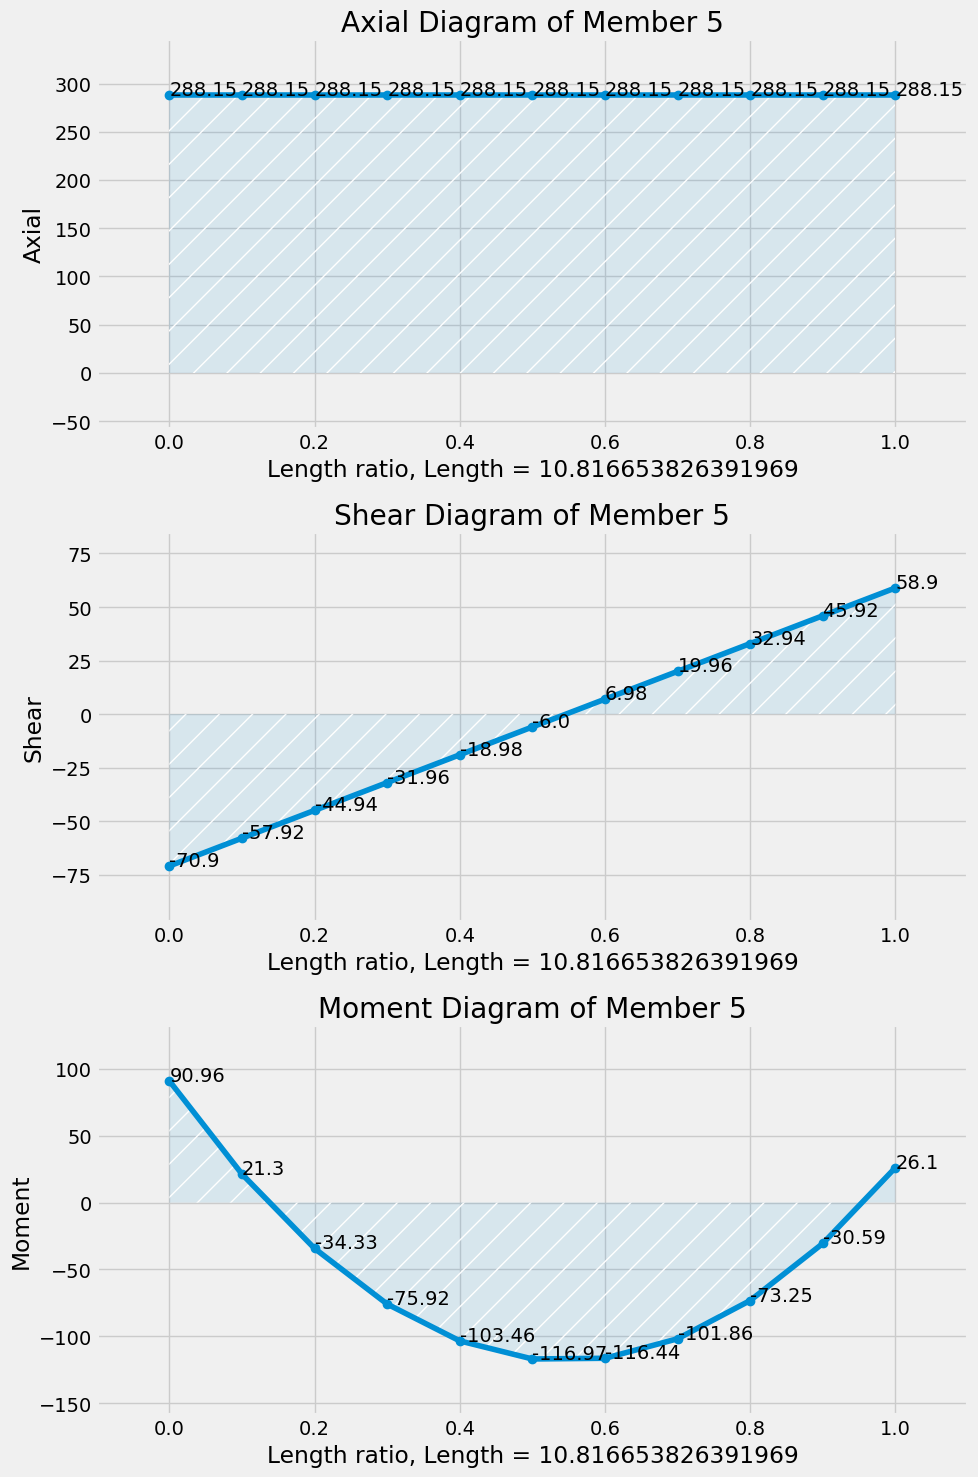

In [41]:
M5.Plot_Diagrams()

In [42]:
M5.Summary()

At Left End:
Axial: 288.154551847565
Shear: -70.89652384851993
Moment: -90.96217037695668

At Right End:
Axial: 288.154551847565
Shear: 58.90332206818368
Moment: -26.099014412974057

Minimum and Maximum
Minimum Shear: -70.89652384851993
Maximum Shear: 58.90332206818368
Minimum Moment: -90.96217037695668
Maximum Moment: 116.96940760503466
